<a href="https://colab.research.google.com/github/afonsosr2/bootcamp_DS_Alura/blob/main/Bootcamp_DS_Mod01_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Science Aplicada

### **Organização:**
Alura Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/

<br>

### **Resolução das aulas e desafios por:**
Afonso Augusto Rios
<br>
Email: afonsosr2@gmail.com

Github: https://github.com/afonsosr2

LinkedIn: https://www.linkedin.com/in/afonsosr2/

# Módulo 01 - Visualizando dados do SUS

## Aula 04
*   Acompanhamento da Aula 04
*   Resolução dos Desafios



Olá, iniciaremos as práticas, análises e estudos sobre dados relativos à saúde no Brasil através do Bootcamp de Data Science Aplicada da Alura. 

Ao longo das aulas vou aplicar o conteúdo aprendido dentro desse curso e resolver os desafios, aproveitando também para fazer minhas próprias análises e olhando os dados de forma mais crítica. 

Nessa aula, abriremos um parágrafo sobre a observação de possíveis manipulações em dados e como estar atento a como eles são apresentados a fim de passar uma informação muito diferente da real.

Vamos começar nosso mergulho? 

### Importando a Base de Dados



Para a nossa segunda análise, vamos importar os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Para a Aula 04 vou seguir muitos dos passos realizados na Aula 03 e seguiremos explorando os dados relativos aos Procedimentos Hospitalares do SUS de 2008 até os dias atuais. Junto a isso, será relizada 3 pequenas análises levando em conta a atenção às manipulações de dados em relação aos valores, período de tempo e escala.

Inicialmente, vamos selecionar os dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

In [99]:
#importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/A111646189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12, thousands = ".",
                    decimal = ",")

# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2351019.41,2342718.63,2286375.90,1774558.12,2761503.37,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,153

### Tratando os dados para a visualização em gráfico






Agora, vamos tratar os dados para que possamos trabalhar apenas com as colunas que possuem todos os valores totais dos custos com o SUS nas Unidades da Federação.

Vamos criar um novo DataFrame que guarde esses valores para analisarmos e visualizarmos esses dados.

In [100]:
# Passando para uma variável do tipo list a posição das colunas com valores numéricos
# e colocando a Unidade de Federação na primeira coluna. 
colunas_completas = dados.mean().index.tolist()
colunas_completas.insert(0,"Unidade da Federação")

Após a criação da lista, vamos criar o nosso novo dataframe seguindo os critérios já explanados.

In [101]:
# Criando o DataFrame dados_completos com as colunas com os valores númericos completos 
# e colocando a Unidade de Federação como index.
dados_completos = dados[colunas_completas]
dados_completos = dados_completos.set_index("Unidade da Federação")

dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

### Visualização dos dados em gráficos




Agora, vamos fazer uma breve exploração dos dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento de alguns estados.

Primeiro, vamos ajustar o nosso dataframe para que a visualização por gráfico fique mais fluida. Então, iremos transpor o nosso gráfico fazendo com que os dados da coluna (mês e ano) passem para linha (Unidades da federação) e vice-versa e, além disso, vamos separar os 'ids' das unidades da federação para que apareça apenas o nome dos estados e criaremos uma coluna com a identificação das regiões desses estados.

In [102]:
# Separando o Id e renomeando o index só com os estados
id_uf = dados_completos.index.str.slice(stop=2)
dados_completos.index = dados_completos.index.str.slice(start=3)

# A Id dos estados estão apresentadas abaixo onde as dezenas representam as regiões
# 1 - Norte, 2 - Nordeste, 3 - Sudeste, 4 - Sul, 5 - Centro-Oeste
nome_regiao = []
for i in id_uf:
  if i[0] == '1':
    nome_regiao.append("Norte")
  if i[0] == '2':
    nome_regiao.append("Nordeste")
  if i[0] == '3':
    nome_regiao.append("Sudeste")
  if i[0] == '4':
    nome_regiao.append("Sul")
  if i[0] == '5':
    nome_regiao.append("Centro-Oeste")
dados_completos["Região"] = nome_regiao

dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68,Norte
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47,Norte
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05,Norte
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2478349.44,2674958.94,2721261.19,2844811.66,2967161.

---

Agora, nós ordenaremos os estados pelos maiores custos com o SUS e tiraremos a coluna de totais.

In [103]:
# Ordenando pelo maior total gasto e retirando a coluna de totais
dados_ordenados_total = dados_completos.sort_values("Total", ascending=False)
dados_ordenados_total = dados_ordenados_total.drop("Total", axis = 1)
dados_ordenados_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,Sudeste
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,Sudeste
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,Sul
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,5197241

Como analisado na Aula 03, existe um período específico em que distorce a  leitura do gráfico e que, portanto, vamos retirá-lo de nossa análise. 

Aqui vamos ajustar nossos dados para abrangermos de 2012 a 2020. Para iniciarmos nossas análises de como não sermos levados a manipulações de dados de outros estudos ou não criarmos tais manipulações, trabalharemos com o Top 3 estados com maiores gastos no SUS e teceremos algumas situações hipotéticas.

In [104]:
# Definindo o período de 2012 a 2020 e dividindo os avlores dos totais para 
# facilitar a leitura dos gastos em milhões de reais
colunas_desejadas = dados_ordenados_total.columns[53:151]
dados_ordenados_total_amostra = dados_ordenados_total[colunas_desejadas]
dados_ordenados_total_amostra = dados_ordenados_total_amostra/1000000
dados_ordenados_total_amostra.head()

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,...,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,236.87,219.47,246.01,231.02,251.74,234.42,244.36,252.27,238.33,279.47,225.84,215.90,253.31,222.56,255.06,262.71,262.64,254.11,263.15,265.97,261.90,285.00,248.14,230.59,269.75,250.45,264.22,258.87,279.79,263.54,278.01,278.61,284.02,277.33,256.26,241.81,265.80,238.35,285.51,265.10,...,257.24,247.86,271.14,247.43,289.14,263.58,292.20,274.42,283.63,300.83,267.35,287.44,267.26,259.64,279.65,254.22,285.35,286.37,291.68,279.10,286.15,295.67,277.69,302.77,278.27,266.77,291.89,268.08,287.15,292.87,309.14,281.62,307.20,303.58,294.08,303.87,282.79,273.36,303.87,272.05
Minas Gerais,119.76,107.16,122.17,112.57,125.68,115.78,122.01,123.94,114.79,122.10,112.21,110.27,120.43,107.90,126.14,131.25,128.91,126.77,132.09,130.24,128.84,134.28,123.89,124.21,134.16,127.95,135.69,138.39,144.30,134.14,142.60,138.80,139.27,143.69,136.08,131.25,131.70,126.06,150.88,142.61,...,129.53,132.63,139.07,129.34,150.30,136.72,153.44,144.31,147.55,156.07,142.29,148.33,142.32,138.37,146.51,130.73,151.51,150.70,153.60,150.26,156.72,160.48,146.00,157.29,148.17,145.42,153.24,142.69,151.98,157.96,163.64,154.17,166.78,161.77,157.44,166.17,152.17,152.47,158.27,141.46
Paraná,74.22,72.97,80.91,78.14,85.40,77.80,83.52,83.84,79.19,84.99,78.73,71.09,81.23,73.98,83.93,91.66,87.75,87.79,91.30,92.87,88.69,92.45,82.39,76.98,85.54,82.97,88.17,86.57,92.57,87.77,94.61,91.49,91.34,94.90,87.57,80.30,83.54,79.57,97.76,89.99,...,101.12,96.71,103.86,96.46,119.14,106.03,120.54,111.73,118.59,122.12,110.72,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.08,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.46,132.61,124.87,134.71,127.17,126.20,133.87,126.22,113.57,122.33,116.13
Rio Grande do Sul,71.52,64.14,73.62,69.01,76.61,74.79,76.92,78.76,69.41,77.16,69.59,67.27,78.35,66.87,76.56,82.71,82.86,80.64,87.46,84.53,81.98,87.45,82.65,77.64,83.66,75.58,82.97,83.60,87.82,85.18,90.59,89.98,90.64,93.42,86.55,81.25,85.25,75.24,95.21,86.94,...,81.92,81.60,87.26,76.07,93.12,83.19,95.15,93.17,94.42,94.23,86.42,91.60,85.79,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.14,95.86,103.04,98.57,94.37,96.97,91.01,88.76,97.61,85.49
Rio de Janeiro,66.75,47.27,59.37,54.03,60.77,56.01,56.52,58.55,53.10,57.97,51.69,47.85,102.10,51.21,57.58,63.70,63.79,61.69,60.99,61.58,59.72,60.87,54.07,53.16,67.00,56.55,60.65,58.61,62.16,63.71,66.15,64.97,65.18,64.03,60.39,62.32,65.30,57.70,67.97,62.43,...,59.55,61.55,68.14,61.48,70.34,64.56,74.49,69.92,73.21,74.71,68.80,73.17,69.37,67.38,72.45,65.06,74.43,74.58,79.42,75.99,77.58,78.92,72.87,79.19,74.02,70.83,79.66,74.14,75.06,76.86,82.67,78.69,88.18,83.62,81.56,82.53,74.78,75.15,80.41,73.15


#### Gráfico 1: Os 3 estados com os maiores gastos no SUS no período entre 2012 e 2020

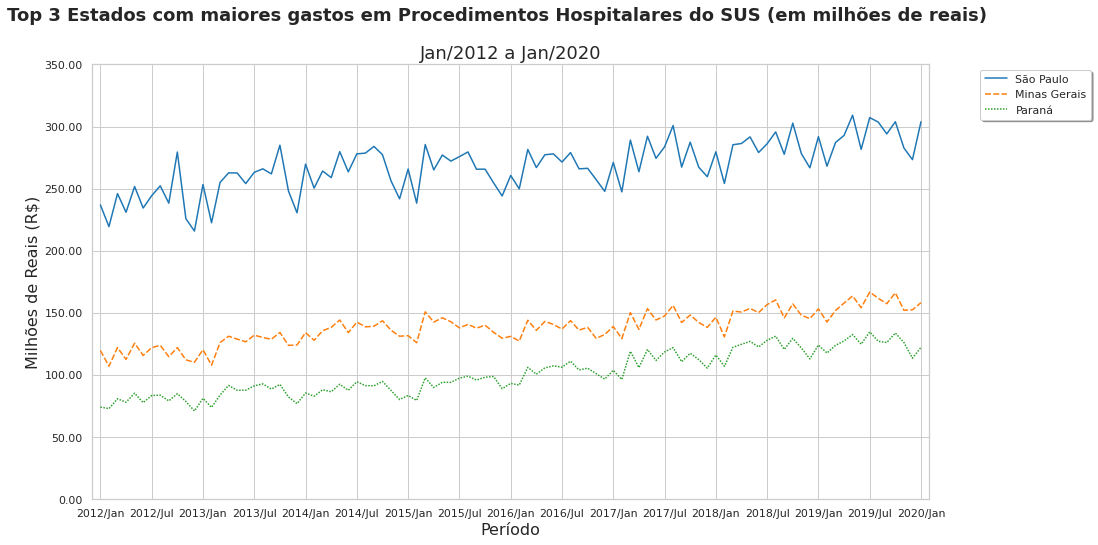

In [105]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Dados para plotar
dados_top_3 = dados_ordenados_total_amostra.iloc[:, :-1].head(3).T

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_top_3, palette= "tab10")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajustando o gráfico de 0 a 350 milhões
plt.ylim(0, 350)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Top 3 Estados com maiores gastos em Procedimentos Hospitalares do SUS (em milhões de reais)",
             size = 18, weight='bold')
plt.title("Jan/2012 a Jan/2020", size = 18)
plt.ylabel("Milhões de Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 6 meses entre eles
ax.set_xticks(dados_top_3.index[0:97:6])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()

#### Gráfico 2: Os 3 estados com os maiores gastos no SUS no período entre 2012 e 2020 (com Manipulação no eixo y)

Ao contrário do Gráfico 01, bem dimensionado no eixo y, o gráfico abaixo é possível de ser mal interpretado dando a impressão de que em São Paulo os gastos com SUS é muito superior ao do Rio de Janeiro e Paraná juntos. Se levarmos em conta, por exemplo, o mês de Jan/2017, na verdade, os gastos com o SUS em São Paulo são menores que o dobro se comparado com o Rio de Janeiro e pouco acima do dobro no Paraná. E pela visualização deste gráfico a impressão é de uma lacuna muito maior.

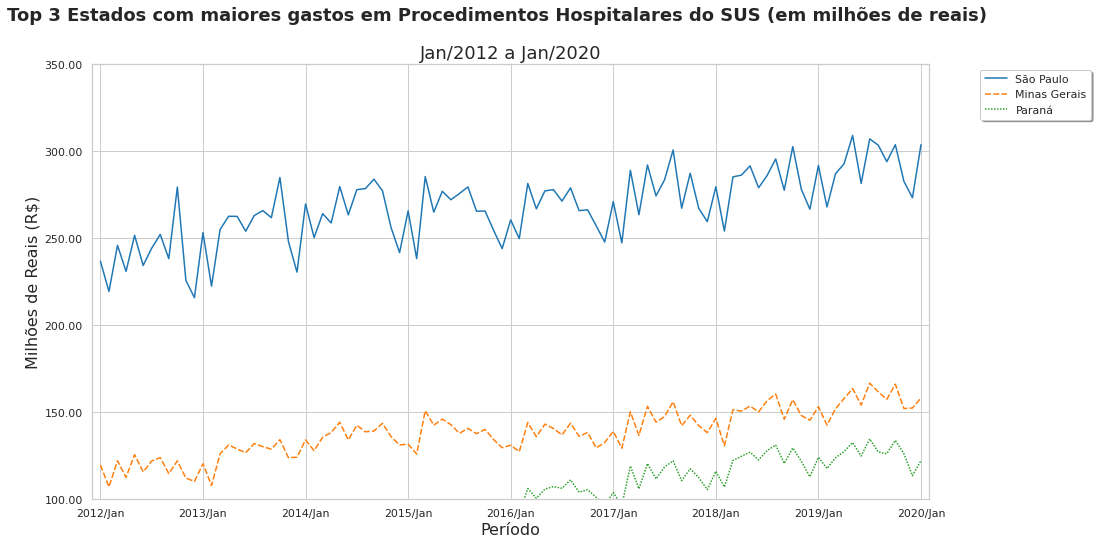

In [106]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Dados para plotar
dados_top_3 = dados_ordenados_total_amostra.iloc[:, :-1].head(3).T

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_top_3, palette= "tab10")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajustando o gráfico de 100 a 350 milhões (__RAIZ DA MANIPULAÇÃO__)
plt.ylim(100, 350)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Top 3 Estados com maiores gastos em Procedimentos Hospitalares do SUS (em milhões de reais)",
             size = 18, weight='bold')
plt.title("Jan/2012 a Jan/2020", size = 18)
plt.ylabel("Milhões de Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 12 meses entre eles
ax.set_xticks(dados_top_3.index[0:97:12])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()

#### Gráfico 3: Os 3 estados com os maiores gastos no SUS no período entre 2012 e 2020 (com Manipulação no período - eixo x)

O gráfico abaixo apresenta uma tendência descrescente no Rio de Janeiro e Paraná que pode ser mal interpretada se só por esse intervalo falarmos que os gastos com o SUS vem sofrendo quedas ou que estão com menos repasses, quando na verdade o intervalo de tempo é insuficiente para se ter tal análise. Se levarmos em conta o Gráfico 01 vemos que entre o período de 2012 a 2020, tanto no Rio de Janeiro quanto no Paraná, a tendência é de alta.

Provando, mais uma vez, que estar atento aos gráficos e como eles estão sendo apresentado é importantíssimo para não tirar conclusões indevidas.

In [107]:
# Usando o Dataframe que vai até 2021/Mar
dados_ordenados_total = dados_ordenados_total.drop("Região", axis = 1)
dados_ordenados_total = dados_ordenados_total/1000000

In [124]:
# Dados para plotar (__RAIZ DA MANIPULAÇÃO__)
dados_top_3_manip = dados_ordenados_total.iloc[:, -19:-10].head(3).T

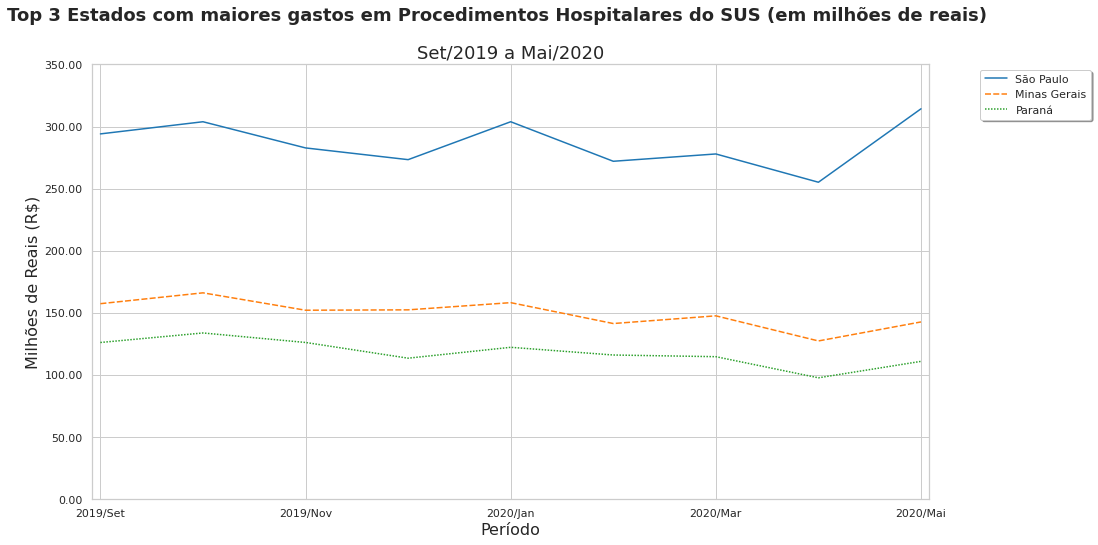

In [126]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_top_3_manip, palette= "tab10")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajustando o gráfico de 0 a 350 milhões
plt.ylim(0, 350)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Top 3 Estados com maiores gastos em Procedimentos Hospitalares do SUS (em milhões de reais)",
             size = 18, weight='bold')
plt.title("Set/2019 a Mai/2020", size = 18)
plt.ylabel("Milhões de Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 2 meses entre eles
ax.set_xticks(dados_top_3_manip.index[0:24:2])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()

#### Gráfico 4: Os 3 estados com os maiores gastos no SUS no período entre 2012 e 2020 (com Manipulação na escala ou no figsize)

Por fim, vemos aqui outro exemplo de manipulação, desta vez por escala, em que ao comprimirmos o gráfico a sensação de um crescimento mais abrupto pode ser observado. Se levarmos em conta o Gráfico 01, vemos que entre o período de 2012 a 2020 os estados tem sim uma tendência de alta de gastos, mas não tão elevado como o Gráfico 04 acaba ressaltando.


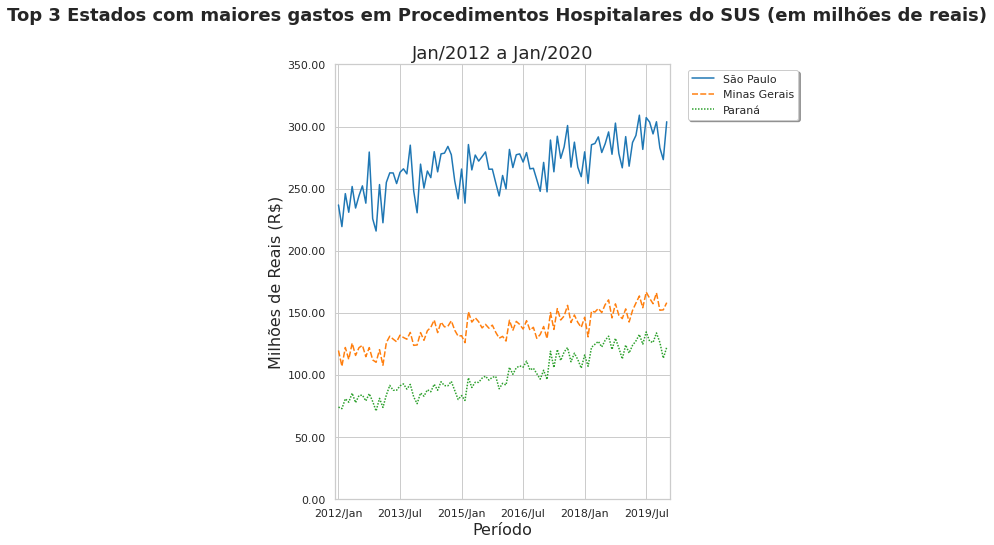

In [133]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 

# Tamanho da figura comprimindo o gráfico demasiadamente (__RAIZ DA MANIPULAÇÃO__)
plt.figure(figsize=(6, 8))

# Dados para plotar
dados_top_3 = dados_ordenados_total_amostra.iloc[:, :-1].head(3).T

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_top_3, palette= "tab10")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajustando o gráfico de 0 a 350 milhões
plt.ylim(0, 350)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Top 3 Estados com maiores gastos em Procedimentos Hospitalares do SUS (em milhões de reais)",
             size = 18, weight='bold')
plt.title("Jan/2012 a Jan/2020", size = 18)
plt.ylabel("Milhões de Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 18 meses entre eles
ax.set_xticks(dados_top_3.index[0:97:18])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()

Portanto, nós como aspirantes ou cientistas de dados precisamos ter o dever ético de sempre prestar atenção em como apresentarmos nossos dados sem que nisso seja buscado um ganho em detrimento da apresentação da verdade que estão nos dados. É sempre importante ter cuidado com o tratamento dos dados e com a informação que você quer e precisa apresentar com eles.